# Exercise 8

In this exercise we are going to use the watershed algorithm to segment the *nuclei* seen earlier. To facilitate your work we copied some of the previous code. You therefore start with an image, and a mask of the contour of the *nuclei*. Our goal is to get whole *nuclei*. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.external.tifffile import TiffFile
from skimage.measure import label, regionprops
from skimage.segmentation import watershed

#import your function
import sys
sys.path.append('../')
from course_functions import detect_nuclei

/Users/gw18g940/miniconda3/envs/improc_env/lib/python3.7/site-packages/skimage/filters/rank/generic.py:119: UserWarning: Bad rank filter performance is expected due to a large number of bins (20304), equivalent to an approximate bitdepth of 14.3.
  out_dtype)


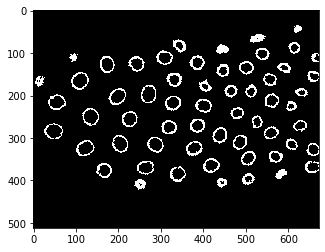

In [2]:
#load the image to process
data = TiffFile('../Data/30567/30567.tif')
image = data.pages[3].asarray()
#create your mask
nuclei = detect_nuclei(image)
plt.imshow(nuclei, cmap = 'gray')
plt.show()

- recover the centroid coordinates of each *nucleus* by using labeling and region properties
- create a marker map where each centroid pixel is labeled
- use that marker map and the image for the wathershed algorithm

# Solutions 8

In [3]:
#find the centroid of each nucleus
im_label = label(nuclei)
regions = regionprops(im_label)
centroids = np.array([x.centroid for x in regions])

In [4]:
emtpy_mask = np.zeros(nuclei.shape)

In [5]:
emtpy_mask[centroids[:,0],centroids[:,1]] = 1

IndexError: arrays used as indices must be of integer (or boolean) type

In [6]:
#create a marker map
markers = np.zeros(image.shape)
markers[centroids[:,0].astype(int),centroids[:,1].astype(int)] = 1
markers = label(markers)

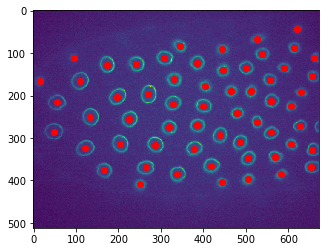

In [7]:
#check that everything is fine
plt.imshow(image)
plt.plot(centroids[:,1],centroids[:,0],'ro')
plt.show()

In [8]:
#use the watershed algorithm
im_water = watershed(image, markers=markers)

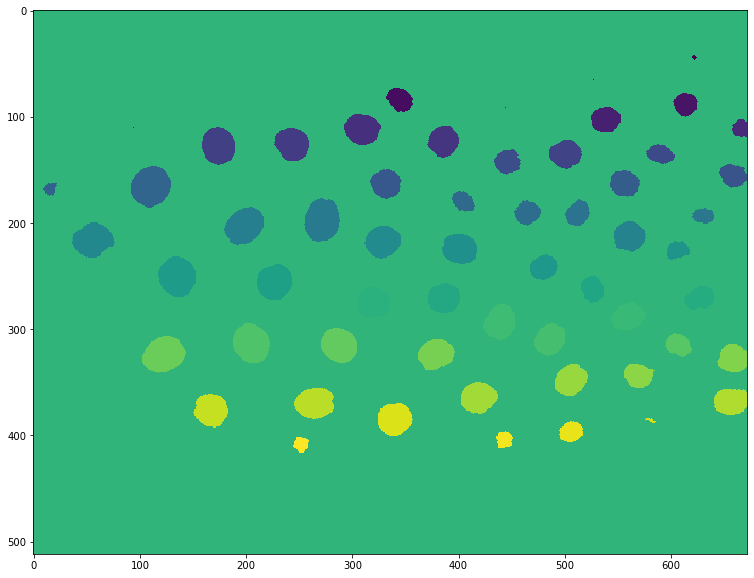

In [9]:
#plot the result
plt.figure(figsize=(20,10))
plt.imshow(im_water)
plt.show()